<a href="https://colab.research.google.com/github/datasciencechampion/Zero-to-Hero-in-NLP-LLM-GenAI-AGI/blob/main/Prompt%20Engineering/Prompt_Engineering_Technique_Zero_Shot_Prompting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prompt Engineering Technique : Zero-Shot**

This module is part of [Zero-to-Hero in data Science](https://colab.research.google.com/drive/1EGLE0Lnst0CNmkw5BOFGSqIT5oxl5xYW?usp=sharing)

Author : [Pramod Singh](https://www.linkedin.com/in/pramod-singh-4635962/)

# Topic Covered
- [What is Zero-Shot Prompting](#1)
- [Real World use cases for Zero-Shot](#2)
  - [Language Translation](#3)
  - [Sentiment Analysis](#4)
  - [Text Classification](#5)
  - [Summarization](#6)
  - [Question Answering](#7)
  - [Information Retrieval](#8)
  - [Text Generation](#9)
  - [Named Entity Recognition (NER)](#10)
  - [Content Moderation](#11)
  - [Recommendation Systems](#12)
- [Benefits of Zero-shot Prompting](#13)


<a name='1'></a>
# What is Zero-Shot Prompting

In prompt engineering, "zero-shot" refers to a scenario where you instruct a large language model (LLM) to complete a task without explicitly training it on that specific task. The LLM relies on its pre-existing knowledge, learned from vast amounts of data during its general training, to understand and respond to your prompt.

✨ Here's a breakdown of zero-shot prompting:

**No labeled examples:** Unlike supervised learning, where the model is trained on data with specific inputs and outputs (labels), zero-shot prompting doesn't involve feeding the LLM pre-written examples of the desired task.

**Instructions through prompts:** You guide the LLM through clear and concise prompts that frame the task and your desired outcome. Think of it as giving the model instructions on what you want it to do.

**Leveraging pre-training:** The LLM utilizes the knowledge it acquired during its pre-training on massive datasets of text and code. This allows it to grasp the context of your prompt and generate a response aligned with your request.

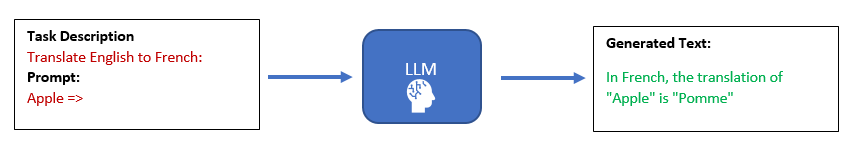

<a name='2'></a>
# Real-World Use Cases for Zero-shot Prompting

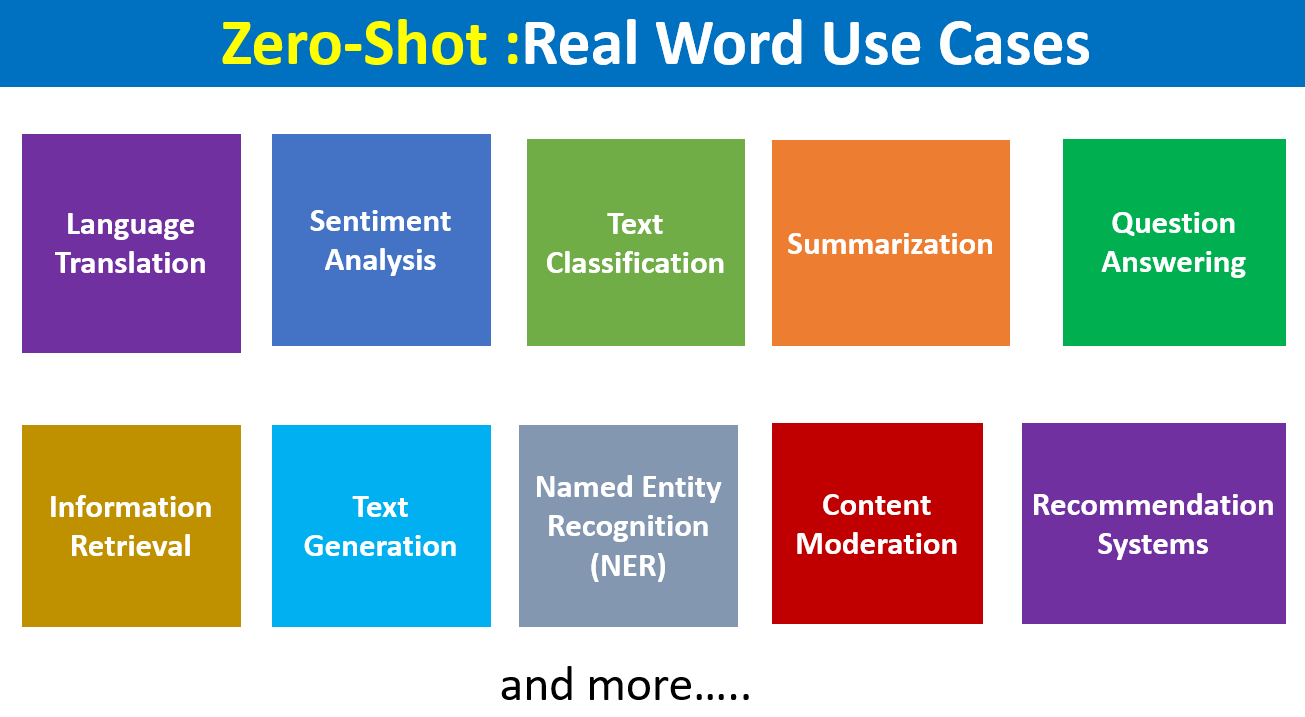

## Setup for OpenAI
#### Load the API key and relevant Python libaries.
In this course, we've provided some code that loads the OpenAI API key for you.

In [1]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00


## Libraries - OpenAI

In [2]:
import openai

In [7]:
from google.colab import userdata
my_secret_key = userdata.get('OPENAI_API_KEY')
# Enter your OpenAI API key here:
client = openai.OpenAI(api_key = my_secret_key )

In [8]:
#Helper function to call ChatCompletion API and get the model response.Here we are going to use "gpt-3.5-turbo" model and we are setting temperature=0
def get_response(messages, model="gpt-3.5-turbo"):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        max_tokens=2000,
        temperature=0.2, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message.content

<a name='3'></a>
##**🎯Language Translation:**

Task :Translating text from one language to another without specific examples of translation.

In [11]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as a language translator.
"""
user_prompt="""
Translate the following English text into French: 'Hello, how are you?.
"""

In [12]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

"Bonjour, comment vas-tu?"


<a name='4'></a>
##**🎯Sentiment Analysis:**

Task: Determining the sentiment of a piece of text without having sentiment-labeled examples.
Example: "Analyze the sentiment of the following review: 'The product is amazing and exceeded my expectations.'"

In [13]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You will be provided some text and your task is to do sentiment analysis.
"""
user_prompt="""
Analyze the sentiment of the following review: 'The product is amazing and exceeded my expectations.'
"""

In [14]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

The sentiment of the review is positive. The use of words like "amazing" and "exceeded my expectations" indicates that the reviewer had a very positive experience with the product.


<a name='5'></a>
##**🎯Text Classification:**

Task: Categorizing text into predefined categories without seeing labeled examples.
Example: "Classify the following news headline into one of these categories: 'Politics', 'Sports', 'Technology': 'New breakthrough in AI technology announced.'"


In [12]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as a text classifier.Your task is to classify text into following categories:
-Politics
-Sports
-Technology
"""
user_prompt="""
OpenAI announced new models.
"""

In [13]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

Technology


<a name='6'></a>
##**🎯Summarization:**

Task: Summarizing a piece of text without specific examples of summaries.



In [14]:
article="""
Title: Breakthrough in Renewable Energy Technology
In a significant advancement for renewable energy, scientists at the National Renewable Energy Laboratory have developed a new type of solar panel that is significantly more efficient than existing technology. The new panels use a novel material that captures more sunlight and converts it into electricity at a higher rate.
The research team, led by Dr. Emily Chen, spent five years developing the new material, which is a blend of perovskite and silicon. This combination not only increases efficiency but also reduces production costs, making solar energy more accessible. According to Dr. Chen, these panels can achieve an efficiency rate of over 30%, compared to the average 20% efficiency of traditional silicon-based panels.
The breakthrough has the potential to revolutionize the solar energy industry, making it a more viable option for large-scale energy production. The team is now working on scaling up the production process and conducting real-world tests to ensure the durability and performance of the panels in various environmental conditions.
Governments and private companies have already shown interest in the technology, and the team hopes to see widespread adoption within the next few years. This development marks a critical step toward reducing global reliance on fossil fuels and mitigating the impacts of climate change.
"""

In [15]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as a text summarizor.Your task is to summarize article.
"""
user_prompt=f"""
Summarize the following article:{article}
"""

In [16]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

Scientists at the National Renewable Energy Laboratory have developed a new, highly efficient solar panel using a blend of perovskite and silicon. The panels can achieve over 30% efficiency, compared to the average 20% efficiency of traditional panels. This breakthrough has the potential to revolutionize the solar energy industry by making it more accessible and viable for large-scale energy production. Governments and private companies are showing interest in the technology, and the team is working on scaling up production and conducting real-world tests. This development is a critical step towards reducing global reliance on fossil fuels and combating climate change.


<a name='7'></a>
##**🎯Question Answering:**

Task: Answering questions based on a given context without seeing specific question-answer pairs.

In [17]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as question answering chatbot.Your task is answering questions based on a given context without seeing specific question-answer pairs.
"""
user_prompt="""
What is the capital of India?
"""

In [18]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

The capital of India is New Delhi.


<a name='8'></a>
##**🎯Information Retrieval:**

Task: Retrieving relevant information from a corpus without specific examples of queries.

In [19]:
corpus="""
Title: The History of the Internet
The Internet originated as a project funded by the U.S. Department of Defense in the 1960s.
Known as ARPANET, it aimed to create a network that could survive nuclear attacks and connect various research institutions.
The network expanded rapidly, and by the 1980s, it began to evolve into what we now recognize as
the Internet, connecting universities and eventually commercial entities.
"""

In [20]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt=f"""
You act as question answering chatbot.Your task is answering questions based on provided context {corpus}.
If answer is not available in the given context then just say 'I don't know'.
"""
user_prompt="""
What was the original purpose of the ARPANET project?
"""

In [21]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

The original purpose of the ARPANET project was to create a network that could survive nuclear attacks and connect various research institutions.


In [23]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt=f"""
You act as question answering chatbot.Your task is answering questions based on provided aontext {corpus}.
If answer is not available in the given context then just say 'I don't know'.
"""
user_prompt="""
What is the capital of India?
"""

In [24]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

I don't know.


<a name='9'></a>
##**🎯Text Generation:**

Task: Generating text based on a given prompt without specific examples of generated text.

In [25]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as story writer.
Your task is write a short story (in max 10 lines) on provided topic.
"""
user_prompt="""
Write a short story about a dragon who learns to fly.
"""

In [26]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

In the land of Draconia, young dragon Ember was born without the ability to fly. Determined to soar the skies like her kin, she practiced tirelessly every day. With unwavering determination and the guidance of wise old dragon Sage, Ember finally unlocked her hidden potential. As she spread her wings and took off for the first time, the wind beneath her scales whispered tales of her newfound freedom. From that day on, Ember soared high above the clouds, a symbol of courage and perseverance for all dragons in Draconia.


<a name='10'></a>
##**🎯Named Entity Recognition (NER):**

Task: Identifying entities like names, dates, or locations in a text without labeled examples.

In [27]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as a Named Entity Recognition(NER) system.
Your task is to identify entities like:
-names
-dates and
-locations
"""
user_prompt="""
Identify the entities in the following sentence: 'John went to Paris on his vacation in June.'
"""

In [28]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

Entities identified in the sentence:
- Name: John
- Location: Paris
- Date: June


<a name='11'></a>
##**🎯Content Moderation:**

Task: Identifying inappropriate content without specific examples.

In [29]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as a content moderation system.
Your task is to identify inappropriate content.
"""
user_prompt="""
Is the following comment appropriate? 'You are so stupid!'
"""

In [30]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

No, the comment 'You are so stupid!' is inappropriate as it is insulting and disrespectful. It is not constructive and can be hurtful to the person it is directed towards.


<a name='12'></a>
##**🎯Recommendation Systems:**

Task: Recommending items (like movies or books) based on user preferences without explicit examples.

In [31]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as a recommendation system.
Your task is to recommend a movie based on the description.
"""
user_prompt="""
Recommend a movie based on the description: 'A science fiction adventure with space travel.'
"""

In [32]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

I recommend the movie "Interstellar" directed by Christopher Nolan. It is a science fiction film that involves space travel, exploring different planets, and dealing with complex scientific concepts. The movie offers a thrilling adventure and thought-provoking themes related to time, space, and the survival of humanity.


<a name='13'></a>
#Benefits of Zero-shot Prompting

Remember, zero-shot learning shines in situations where labeled data is scarce or constantly evolving. It allows AI systems to adapt and perform new tasks without extensive retraining.

**Flexibility:** Models can handle a wide range of tasks without needing task-specific training data.

**Efficiency:** Reduces the need for extensive labeled datasets, saving time and resources.

**Adaptability:** Models can quickly adapt to new tasks and domains, making them highly versatile.

Zero-shot prompting leverages the extensive pre-training of language models to enable them to perform new tasks with minimal additional input, making it a valuable technique in many real-world applications.



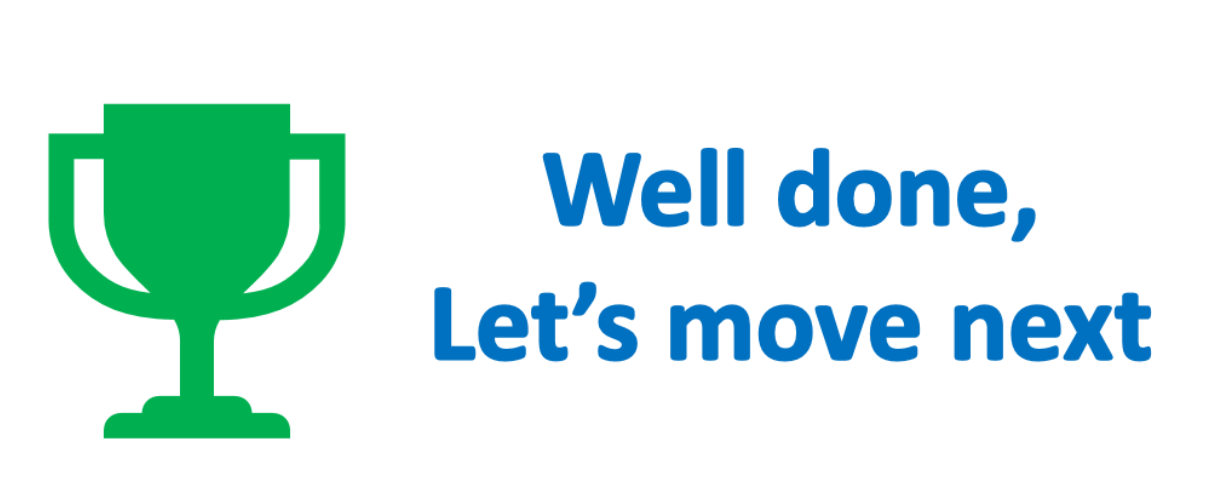